# Comcast Telecom Consumer Complaints
DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

### Data Dictionary

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone

### Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

### Import data into Python environment

In [3]:
comcast_df = pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [43]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [45]:
type(comcast_df['Date_month_year'].iloc[0])

str

In [4]:
comcast_df['Date_month_year'] = pd.to_datetime(comcast_df['Date_month_year'])
type(comcast_df['Date_month_year'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
comcast_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [6]:
# Adding new columns month and day of week
comcast_df['Month'] = comcast_df.apply(lambda x : x['Date_month_year'].month,axis=1)
comcast_df['Day of Week'] = comcast_df.apply(lambda x : x['Date_month_year'].dayofweek,axis=1)

In [7]:
comcast_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,1
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,5
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,6
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,1
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,6
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,2
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,1
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,1
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,6


In [8]:
# Creating date map and changing numbers to Days of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
comcast_df['Day of Week'] = comcast_df['Day of Week'].map(dmap)
comcast_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tue
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,Sun
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,Wed
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,Tue
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,Tue
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,Sun


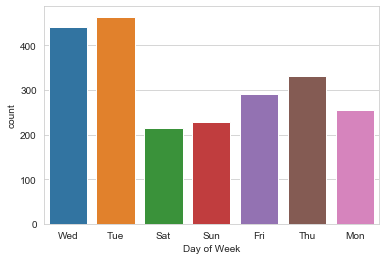

In [57]:
sns.countplot(x='Day of Week',data =comcast_df)

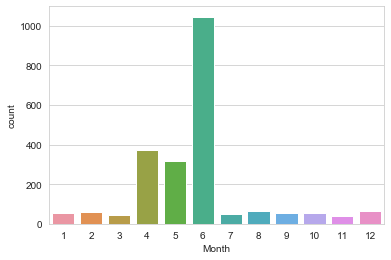

In [58]:
sns.countplot(x='Month',data =comcast_df)

In [59]:
df_byMonth = comcast_df.groupby('Month',as_index=False).count()

In [60]:
df_byMonth.head(20)

,Month,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day of Week
0,1,55,55,55,55,55,55,55,55,55,55,55,55
1,2,59,59,59,59,59,59,59,59,59,59,59,59
2,3,45,45,45,45,45,45,45,45,45,45,45,45
3,4,375,375,375,375,375,375,375,375,375,375,375,375
4,5,317,317,317,317,317,317,317,317,317,317,317,317
5,6,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046
6,7,49,49,49,49,49,49,49,49,49,49,49,49
7,8,67,67,67,67,67,67,67,67,67,67,67,67
8,9,55,55,55,55,55,55,55,55,55,55,55,55
9,10,53,53,53,53,53,53,53,53,53,53,53,53


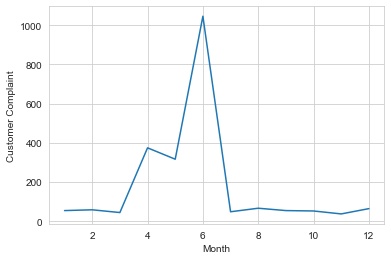

In [61]:
sns.set_style('whitegrid')
sns.lineplot(x='Month',y='Customer Complaint',data = df_byMonth)

##### Their was a sudden spike in the number of complaintes in the month of June

In [62]:
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tue


In [63]:
df_byDayOfWeek = comcast_df.groupby('Day of Week',as_index=False).count().sort_values('Date_month_year')
df_byDayOfWeek

,Day of Week,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
2,Sat,214,214,214,214,214,214,214,214,214,214,214,214
3,Sun,228,228,228,228,228,228,228,228,228,228,228,228
1,Mon,256,256,256,256,256,256,256,256,256,256,256,256
0,Fri,290,290,290,290,290,290,290,290,290,290,290,290
4,Thu,331,331,331,331,331,331,331,331,331,331,331,331
6,Wed,441,441,441,441,441,441,441,441,441,441,441,441
5,Tue,464,464,464,464,464,464,464,464,464,464,464,464


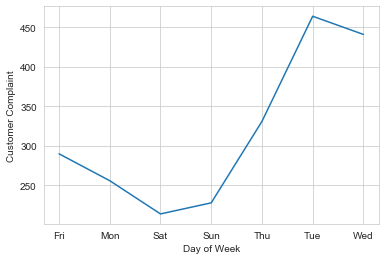

In [64]:
sns.lineplot(x='Day of Week',y='Customer Complaint',data=df_byDayOfWeek)

##### The number of complaints coming in during weekdays are higher on Tuesday

### Provide a table with the frequency of complaint types

In [65]:
# 1. Try to identify the complaint types from the 'Customer Complaints' columns. 
# 2. List get the count of the key words.
# 3. List down the top 20 or 30 words with in count. 
# 4. Get its text back. 
# 5. Create a graph for it

In [66]:
comcast_df['Customer Complaint'].value_counts()

Comcast                                              83
Comcast Internet                                     18
Comcast Data Cap                                     17
comcast                                              13
Comcast Data Caps                                    11
                                                     ..
Price manipulation                                    1
Xfinity Cable & Internet repackage scam               1
online adertised price was not honored over phone     1
Comcast No Show's                                     1
customer services                                     1
Name: Customer Complaint, Length: 1841, dtype: int64

In [67]:
# import required libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

In [68]:
customize_stop_words = ['comcast', 'i', 'fcc', 'hello', 'service', 'services', 'issue', 'day','someone','called','call'
                        'issues', 'problem', 'problems', 'xfinity', 'customer', 'complaint', '$','10','4','etc','hbo','isp','every'
                       'udp','xfinitycomcast','comcastxfinity','reported','agency','take','however','like','still','comcasts','feel'
                       'also','atlanta','without']

In [69]:
print(customize_stop_words)

['comcast', 'i', 'fcc', 'hello', 'service', 'services', 'issue', 'day', 'someone', 'called', 'callissues', 'problem', 'problems', 'xfinity', 'customer', 'complaint', '$', '10', '4', 'etc', 'hbo', 'isp', 'everyudp', 'xfinitycomcast', 'comcastxfinity', 'reported', 'agency', 'take', 'however', 'like', 'still', 'comcasts', 'feelalso', 'atlanta', 'without']


In [70]:
customize_stop_words = customize_stop_words + stopwords.words('english')

In [71]:
customize_stop_words

['comcast',
 'i',
 'fcc',
 'hello',
 'service',
 'services',
 'issue',
 'day',
 'someone',
 'called',
 'callissues',
 'problem',
 'problems',
 'xfinity',
 'customer',
 'complaint',
 '$',
 '10',
 '4',
 'etc',
 'hbo',
 'isp',
 'everyudp',
 'xfinitycomcast',
 'comcastxfinity',
 'reported',
 'agency',
 'take',
 'however',
 'like',
 'still',
 'comcasts',
 'feelalso',
 'atlanta',
 'without',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 

In [72]:
# Tokenizes, removes stopwords, and lemmatizes a message text message: a free-form text Customer Complaint
def remStopWords(message):

    message = message.split('\n')[0].lower()

    sent = []
    no_punctuation = [char for char in message if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    split_sentence = no_punctuation.split()
    for word in split_sentence:
        if word.lower() not in customize_stop_words:
            sent.append(word.lower())
        
    return sent
#     message = message.split('\n')[0].lower()
#     sent = []
# #     doc = nlp(message)    
# #     for word in doc:
# #         # If it's not a stop word or punctuation mark, add it to our article!
# #         if word.text != 'n' and not word.is_stop and not word.is_punct and not word.like_num:
# #             # We add the lematized version of the word
# #             sent.append(word.lemma_.lower())
# #     return sent

In [73]:
# Tokenize each complaintlist
keyWords_CC = comcast_df['Customer Complaint'].apply(lambda message: remStopWords(message))
keyWords_CC[0]

['cable', 'internet', 'speeds']

[('internet', 517), ('billing', 281), ('data', 219), ('speed', 116), ('cap', 103), ('issues', 90), ('caps', 78), ('practices', 73), ('speeds', 71), ('charges', 71), ('bill', 64), ('unfair', 58), ('throttling', 53), ('cable', 50), ('slow', 49), ('usage', 47), ('poor', 43), ('pricing', 39), ('price', 39), ('connection', 34), ('business', 33), ('contract', 28), ('false', 27), ('charged', 27), ('account', 26), ('charging', 25), ('fees', 25), ('deceptive', 23), ('charge', 23), ('high', 23)]


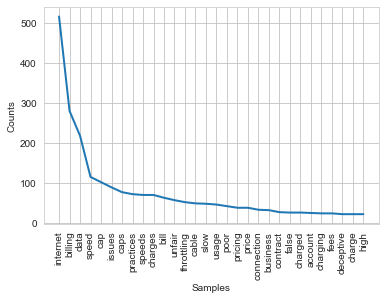

In [74]:
# cats = comcast_df['Customer Complaint'].apply(lambda message: remStopWords(message))
filtered_complaints = [c for cl in keyWords_CC for c in cl]
fdist = FreqDist(filtered_complaints)
print(fdist.most_common(30))
fdist.plot(30)

In [75]:
filtered_complaints

['cable',
 'internet',
 'speeds',
 'payment',
 'disappear',
 'got',
 'disconnected',
 'speed',
 'imposed',
 'new',
 'usage',
 'cap',
 '300gb',
 'punishes',
 'streaming',
 'working',
 'boot',
 'charging',
 'arbitrary',
 'data',
 'limits',
 'overage',
 'fees',
 'throttling',
 'unreasonable',
 'data',
 'caps',
 'refuses',
 'help',
 'troubleshoot',
 'correct',
 'extended',
 'outages',
 'raising',
 'prices',
 'available',
 'ask',
 'billing',
 'asked',
 'disconnected',
 'yahoo',
 'failure',
 'restore',
 'email',
 'search',
 'feature',
 'violating',
 'open',
 'internet',
 'rules',
 'blocking',
 'go',
 'access',
 'sony',
 'consoles',
 'internet',
 'speed',
 'internet',
 'disconnects',
 'every',
 'night',
 'internet',
 'internet',
 'availability',
 'speed',
 'owes',
 '65',
 'claims',
 'need',
 'return',
 'equipment',
 'never',
 'horrible',
 'internet',
 'failure',
 'provide',
 'billed',
 'internet',
 'time',
 'monopoly',
 'horrible',
 'cable',
 'speed',
 'monopoly',
 'bundling',
 'practices',
 

In [76]:
counts,values = pd.Series(filtered_complaints).value_counts().values, pd.Series(filtered_complaints).value_counts().index
df_results = pd.DataFrame(list(zip(values,counts)),columns=["value","count"])
df_results.head(20)

,value,count
0,internet,517
1,billing,281
2,data,219
3,speed,116
4,cap,103
5,issues,90
6,caps,78
7,practices,73
8,charges,71
9,speeds,71


#### Maximum complaints are for Internet, Billing and Data

#### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [77]:
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tue


In [87]:
def change_status(in_status):
    if ((in_status == 'Open')|(in_status == 'Pending')):
        return 'Open'
    elif ((in_status == 'Closed')|(in_status == 'Solved')):
        return 'Closed'
    else:
        return 'Unkown'
    

In [90]:
comcast_df['New Status'] = comcast_df['Status'].apply(lambda status : change_status(status))

In [91]:
comcast_df.head(20)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day of Week,New Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Tue,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Sun,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tue,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,Sun,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,Wed,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,Tue,Closed
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,Tue,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,Sun,Open


#### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on

In [148]:
df_comcast_statewise_complains = pd.DataFrame({'Total':comcast_df.groupby(['State','New Status'])['New Status'].count()})

In [149]:
df_comcast_statewise_complains

Total
State         New Status       
Alabama       Closed         17
              Open            9
Arizona       Closed         14
              Open            6
Arkansas      Closed          6
...                         ...
Virginia      Open           11
Washington    Closed         75
              Open           23
West Virginia Closed          8
              Open            3

[77 rows x 1 columns]

In [150]:
df_comcast_statewise_complains = df_comcast_statewise_complains.unstack()
df_comcast_statewise_complains = df_comcast_statewise_complains.fillna(0)
df_comcast_statewise_complains.head(5)

Total      
New Status Closed  Open
State                  
Alabama      17.0   9.0
Arizona      14.0   6.0
Arkansas      6.0   0.0
California  159.0  61.0
Colorado     58.0  22.0

In [158]:
df2 = df_comcast_statewise_complains.xs('Total',axis=1)

In [163]:
df3 = df2.xs('Closed',axis=1)

In [165]:
df4 = df2.xs('Open',axis=1)
df4.head()

State
Alabama        9.0
Arizona        6.0
Arkansas       0.0
California    61.0
Colorado      22.0
Name: Open, dtype: float64

In [177]:
df5 = pd.concat([df3,df4],axis=1)
df5 = df5.reset_index()

In [223]:
df5['Total'] = df5['Closed'] + df5['Open']
df5.head()

,State,Closed,Open,Total
0,Alabama,17.0,9.0,26.0
1,Arizona,14.0,6.0,20.0
2,Arkansas,6.0,0.0,6.0
3,California,159.0,61.0,220.0
4,Colorado,58.0,22.0,80.0


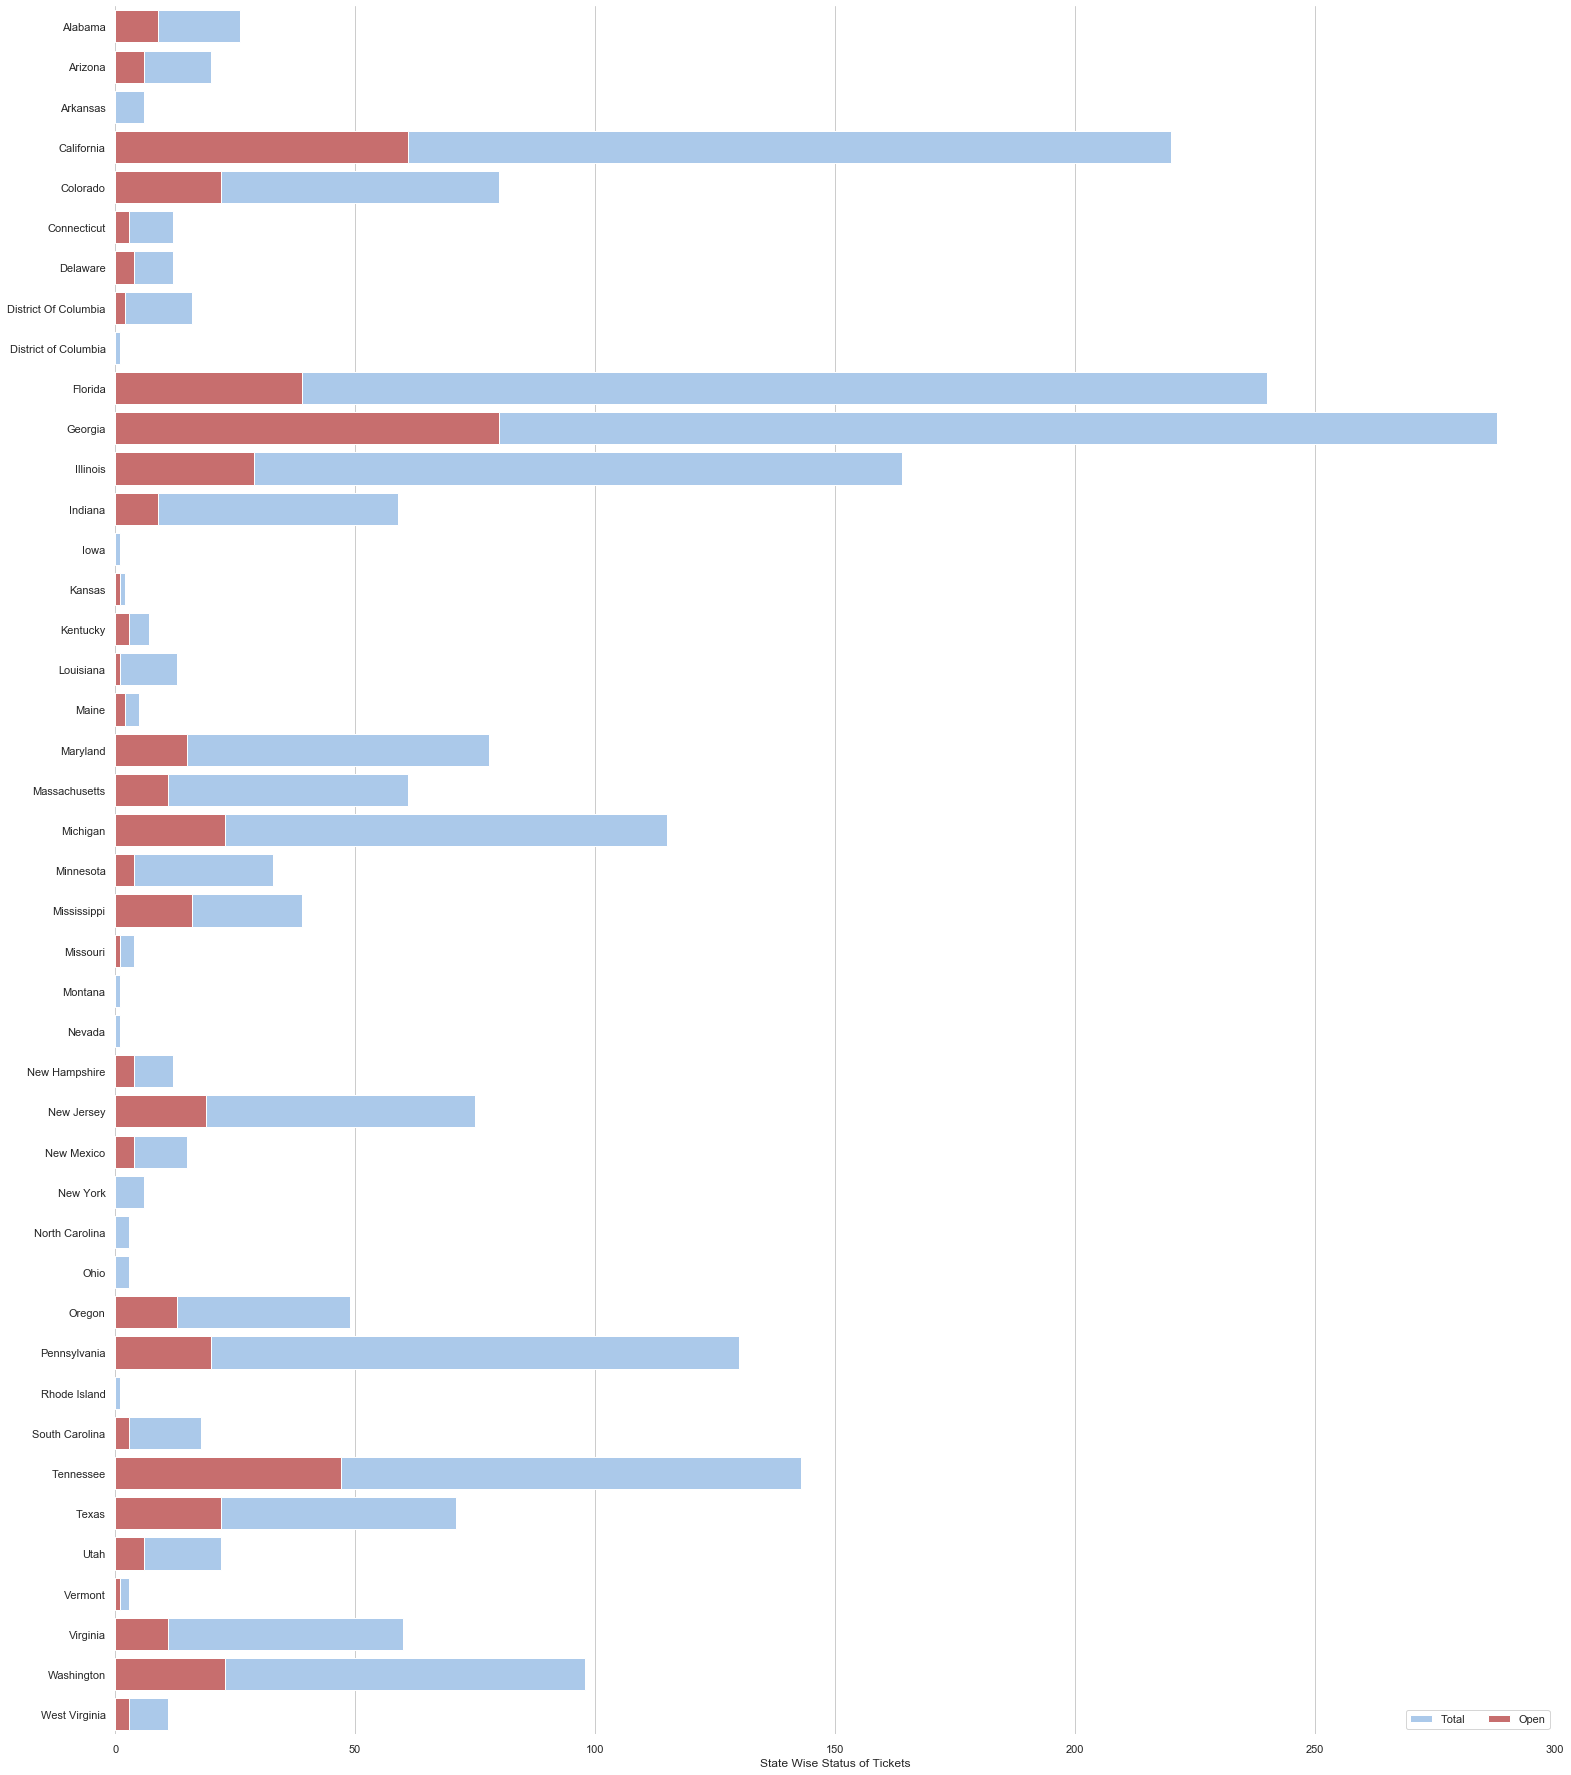

In [222]:
# Initialize the matplotlib figure
sns.set(style="whitegrid")
# Plot the total Tickets
sns.set_color_codes("pastel")
fig = plt.figure(figsize=(20,24))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x="Total", y="State", data=df5, label="Total", color="b")

# Plot the 
sns.set_color_codes("muted")
sns.barplot(x="Open", y="State", data=df5, label="Open", color="r")

# # Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,300), ylabel="", xlabel="State Wise Status of Tickets")
sns.despine(left=True, bottom=True)

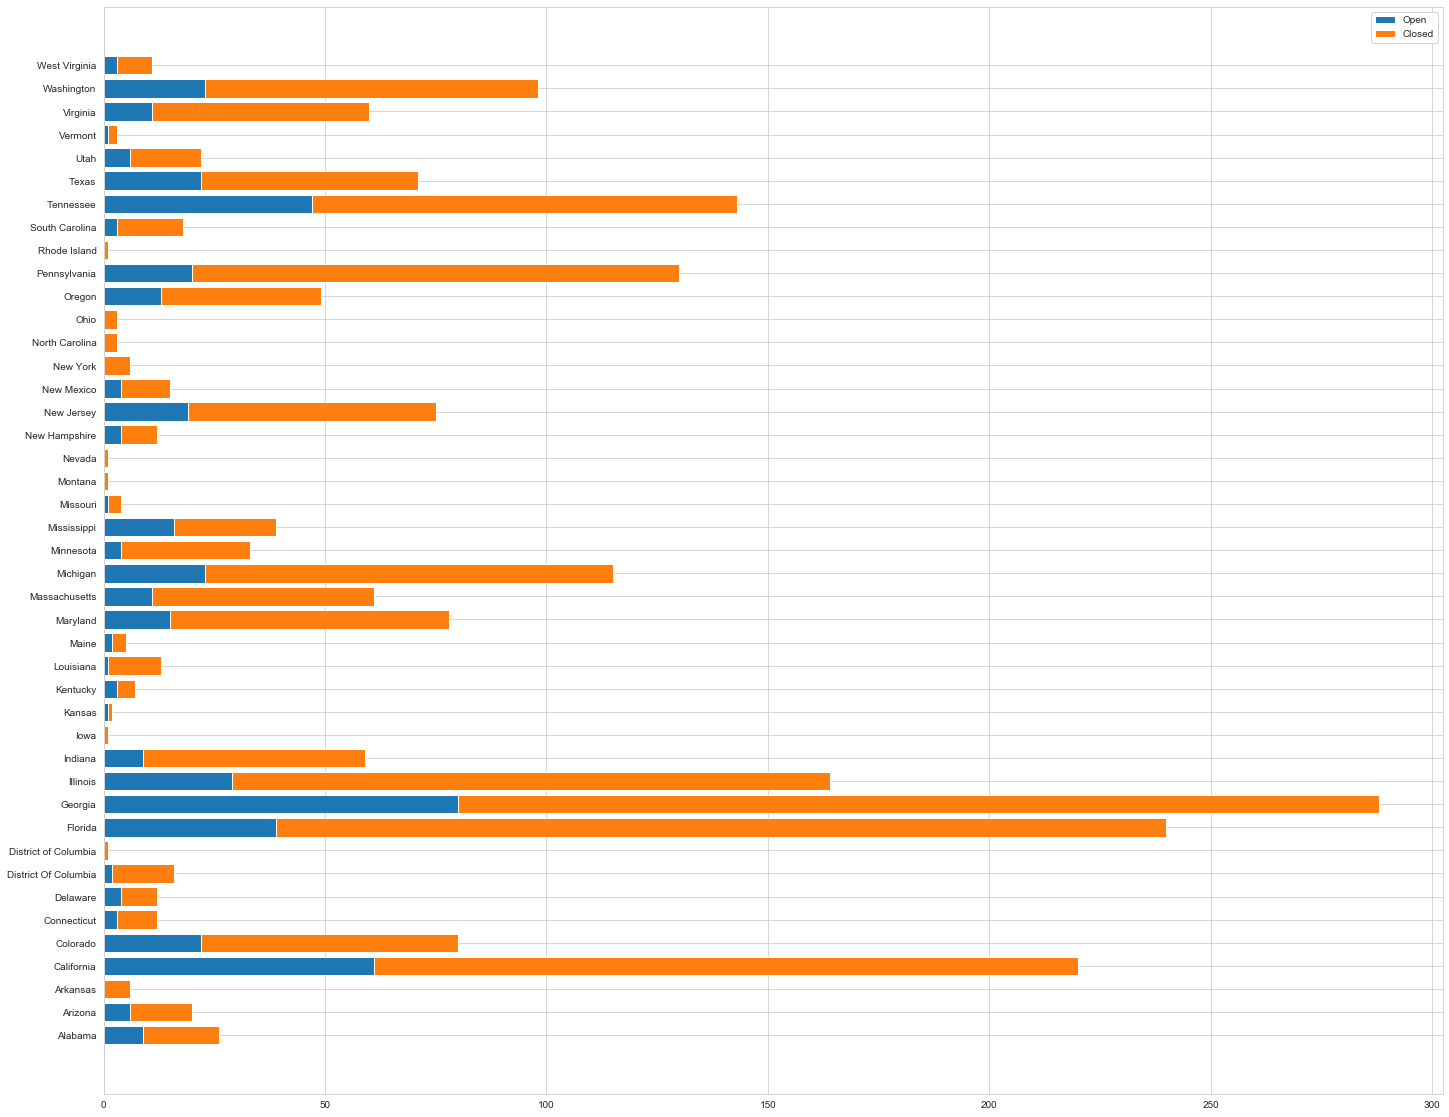

In [126]:
plt.figure(figsize=(24,20))
open_plt = plt.barh(df_comcast_statewise_complains.index,df_comcast_statewise_complains['Total','Open'] ,tick_label=df_comcast_statewise_complains.index)
closed_plt = plt.barh(df_comcast_statewise_complains.index,df_comcast_statewise_complains['Total','Closed'], left = df_comcast_statewise_complains['Total','Open'])
plt.legend((open_plt[0], closed_plt[0]), ('Open', 'Closed'))

#### From the above change Gerogia State is having maximum complaints.  


In [224]:
df5.head()

,State,Closed,Open,Total
0,Alabama,17.0,9.0,26.0
1,Arizona,14.0,6.0,20.0
2,Arkansas,6.0,0.0,6.0
3,California,159.0,61.0,220.0
4,Colorado,58.0,22.0,80.0


In [229]:
df5['Percent of Unresolved'] = (df5['Open']/df5['Total']) * 100
df5.sort_values('Percent of Unresolved')

,State,Closed,Open,Total,Percent of Unresolved
13,Iowa,1.0,0.0,1.0,0.000000
25,Nevada,1.0,0.0,1.0,0.000000
2,Arkansas,6.0,0.0,6.0,0.000000
24,Montana,1.0,0.0,1.0,0.000000
29,New York,6.0,0.0,6.0,0.000000
30,North Carolina,3.0,0.0,3.0,0.000000
34,Rhode Island,1.0,0.0,1.0,0.000000
8,District of Columbia,1.0,0.0,1.0,0.000000
31,Ohio,3.0,0.0,3.0,0.000000
16,Louisiana,12.0,1.0,13.0,7.692308


#### Here are two ways to look at it. 
#### 1. With respect to individual state's Open v/s Closed complaints, Kansas is having highest percentage of Unresolved complaints.

In [230]:
df5.sort_values('Open')

,State,Closed,Open,Total,Percent of Unresolved
29,New York,6.0,0.0,6.0,0.000000
25,Nevada,1.0,0.0,1.0,0.000000
2,Arkansas,6.0,0.0,6.0,0.000000
34,Rhode Island,1.0,0.0,1.0,0.000000
31,Ohio,3.0,0.0,3.0,0.000000
13,Iowa,1.0,0.0,1.0,0.000000
8,District of Columbia,1.0,0.0,1.0,0.000000
30,North Carolina,3.0,0.0,3.0,0.000000
24,Montana,1.0,0.0,1.0,0.000000
16,Louisiana,12.0,1.0,13.0,7.692308


#### 2.  With to total number of complaints that are open among the states Georgia is having maximum unresolved complaints.

In [231]:
comcast_df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [232]:
df5['Open'].sum()

517.0

In [234]:
df5['Closed'].sum()

1707.0

In [235]:
df5['Total'].sum()

2224.0

In [237]:
percentage_resolved = (df5['Closed'].sum()/df5['Total'].sum()) * 100
percentage_resolved

76.75359712230215

#### Of the total number of complaints received from all the states, 76.75% of complaits are resolved by Comcast till date.

### Summary
#### Maximum Complaint from comcast customers are for Internet, Billing and Data.
#### State of Georgia is having the maximum number of complaints followed by Florida and then California.
#### For maximum percentage of unresolved complaints there are two ways to look at it.
#### 1. Unresolved complaints percentage in a state when that compared to total complaints received. Here Kansas is having the highest percentage of unresolved complaints.
#### 2. Unresolved complaints percentage among the states. Here Georgia is having the highest percentage of unresolved complaints among the states. 
#### 76.75% of the total complaints received from Comcast customers across USA are resolved till date. 